<a href="https://colab.research.google.com/github/NataGoto/MNIST_recognition/blob/main/Onedelivery_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!ls "/content/drive/MyDrive/Onedelivery/ОД заказы для AI - 01062023-01122023.csv"

'/content/drive/MyDrive/Onedelivery/ОД заказы для AI - 01062023-01122023.csv'


In [6]:
import shutil
shutil.copy("/content/drive/MyDrive/Onedelivery/ОД заказы для AI - 01062023-01122023.csv", "/content/1dataset.csv")

'/content/1dataset.csv'

In [7]:
import pandas as pd

# Load the dataset
file_path = '/content/1dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for a preliminary overview
data.head() # мы видим что в датасете есть мгого незаполненных данных


,№,Оформлен,Заказчик,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Стоимость товара,Количество
0,64505.0,30.06.2023 17:52,406285.0,Доставка,30.06.2023 19:51,2675.0,В работе,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164038.0,2325.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164039.0,50.0,1.0
3,64501.0,30.06.2023 15:45,777245.0,Доставка,30.06.2023 17:44,1690.0,В работе,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164025.0,1690.0,1.0


In [8]:
#оценим маштаб полноты информации. Подсчитаем общее количество заказов в датасете.
# Оценим количество заказов с отсутствующими данными (NaN) в каждой колонке, чтобы понять масштаб потерь информации.
# Проверим количество анонимных заказов, то есть заказов без идентификатора заказчика.

# Загрузка датасета
file_path = '/content/1dataset.csv'
data = pd.read_csv(file_path)

# Общее количество заказов
total_orders = len(data)

# Подсчет заказов с отсутствующими данными (NaN) по каждой колонке
nan_counts_per_column = data.isna().sum()

# Подсчет анонимных заказов (без идентификатора заказчика)
anonymous_orders = data['Заказчик'].isna().sum()

print(f"Общее количество заказов: {total_orders}")
print("Количество заказов с отсутствующими данными по колонкам:")
print(nan_counts_per_column)
print(f"Количество анонимных заказов: {anonymous_orders}")


Общее количество заказов: 2310
Количество заказов с отсутствующими данными по колонкам:
№                   1357
Оформлен            1357
Заказчик            1357
Тип заказа          1359
Время доставки      1520
Стоимость           1357
Статус заказа       1378
Товар                953
Стоимость товара     953
Количество           957
dtype: int64
Количество анонимных заказов: 1357


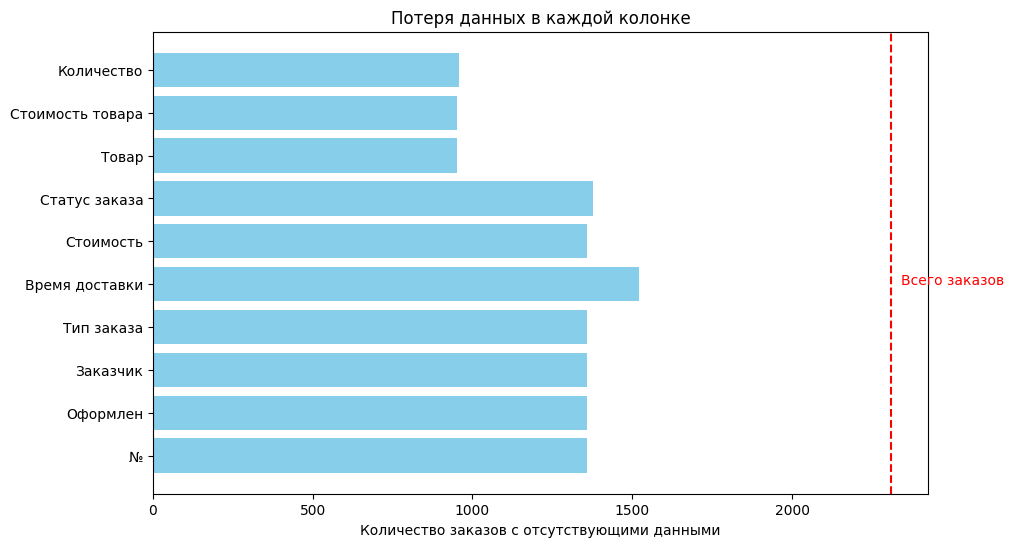

In [9]:
import matplotlib.pyplot as plt

# Данные о потерянной информации
total_orders = 2310
nan_counts = {
    "№": 1357,
    "Оформлен": 1357,
    "Заказчик": 1357,
    "Тип заказа": 1359,
    "Время доставки": 1520,
    "Стоимость": 1357,
    "Статус заказа": 1378,
    "Товар": 953,
    "Стоимость товара": 953,
    "Количество": 957
}

# Создание визуализации
plt.figure(figsize=(10, 6))
plt.barh(list(nan_counts.keys()), list(nan_counts.values()), color='skyblue')
plt.xlabel('Количество заказов с отсутствующими данными')
plt.title('Потеря данных в каждой колонке')
plt.axvline(x=total_orders, color='red', linestyle='--')
plt.text(total_orders + 30, 4, 'Всего заказов', color='red')

# Показ графика
plt.show()


In [10]:
import pandas as pd



# Предварительная обработка данных
# Удаление строк, где товар не указан
data_cleaned = data.dropna(subset=['Товар'])

# Подсчет количества заказов каждого товара
product_counts = data_cleaned['Товар'].value_counts()

# Получение топ-10 наиболее популярных товаров
top_products = product_counts.head(10)

print("Топ-10 популярных товаров:")
print(top_products)


Топ-10 популярных товаров:
164038.0    1
167073.0    1
167002.0    1
167003.0    1
167021.0    1
167022.0    1
167023.0    1
167024.0    1
167033.0    1
167034.0    1
Name: Товар, dtype: int64
